**1. Read raw data from google sheet as Dataframe and print some detail of the dataframe**

In [1]:
from io import BytesIO
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
##Write your code here:
sheet_url = 'https://docs.google.com/spreadsheets/d/1eJkI0JhHr-Es0Wd4ZfIR0aC9pfP0WEpp/edit#gid=838822630'
df = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
df = pd.read_csv(df)
df

,Order ID,Item ID,Gender,Payment Method,Shipping Carrier,Category,Shop ID,Buyer ID,Voucher Subsidy,Rebate Subsidy,Shipping Subsidy,Revenue,Purchase Date
0,36349200575849,2312499781,Female,Bank Transfer,Shopee Express,Home & Living,6062144,101134,0.0,0.0,0,155,2/1/2020
1,36349201213256,2323193650,Female,Cash on Delivery,Kerry,Stationery & Books,133280183,227715943,0.0,0.0,0,18,2/1/2020
2,36349201512214,6704558144,Male,Cash on Delivery,DHL Domestic,Sports & Outdoors,192677978,79779549,0.0,0.0,0,129,2/1/2020
3,36349201782432,1566237163,Male,Online Banking,Thailand Post - EMS,Men Shoes,34195401,7285394,0.0,0.0,0,1200,2/1/2020
4,36349202295995,2353089981,Male,Cash on Delivery,J&T Express,Home & Living,38342820,227913049,0.0,0.0,0,109,2/1/2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9382,36351639214024,2303804811,Male,e-Wallet,Kerry,Home Entertainment,123919188,21968118,0.0,0.0,0,80,2/22/2020
9383,36351639214025,670894948,Male,e-Wallet,Kerry,Mobile & Gadgets,15455215,21968118,0.0,0.0,0,38,2/22/2020
9384,36351639214026,1758139206,Male,e-Wallet,Standard Express,Computers & Laptops,91794648,21968118,0.0,0.0,0,4,2/22/2020
9385,36351639214027,1936938417,Male,e-Wallet,Kerry,Computers & Laptops,5325496,21968118,0.0,0.0,0,120,2/22/2020


**2. Create a dataframe of each category like the following table**

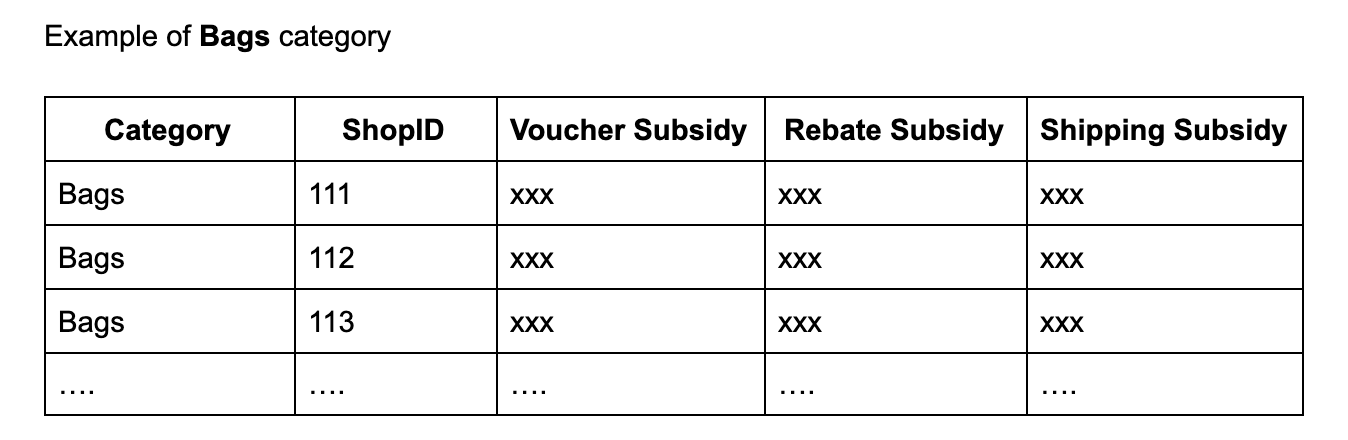

In [2]:
##Write your code here:
df2 = df[['Category','Shop ID','Voucher Subsidy','Rebate Subsidy','Shipping Subsidy']]
df2.sort_values(by=['Category','Shop ID'])

,Category,Shop ID,Voucher Subsidy,Rebate Subsidy,Shipping Subsidy
7359,Baby & Toys,73483,0.0,0.0,0
8347,Baby & Toys,73483,0.0,0.0,0
7722,Baby & Toys,79309,0.0,0.0,0
579,Baby & Toys,211634,0.0,0.0,0
4744,Baby & Toys,411842,54.0,0.0,0
...,...,...,...,...,...
8573,Women Shoes,189190326,0.0,0.0,0
6735,Women Shoes,199943325,0.0,0.0,0
3631,Women Shoes,203222018,0.0,0.0,30
92,Women Shoes,206083182,0.0,0.0,0


**3. What's the top 10 products that buyers order the most for each category?**

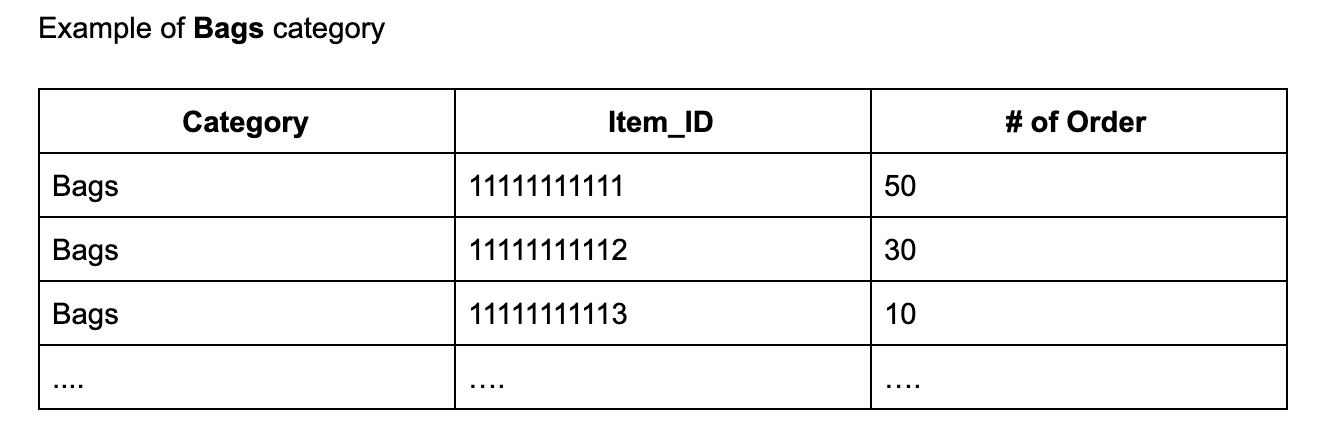

In [3]:
##Write your code here:
df3 = df[['Category', 'Item ID']]
df3 = df3.groupby(["Category", "Item ID"])["Item ID"].count().reset_index(name='# of Order')
df3 = df3.groupby(['Category']).apply(lambda x: x.sort_values(['# of Order'],ascending = False)).reset_index(drop = True)
df3 = df3.groupby(['Category']).head(10)
df3
####################

,Category,Item ID,# of Order
0,Baby & Toys,970109914,26
1,Baby & Toys,436030960,10
2,Baby & Toys,2808503073,8
3,Baby & Toys,131396421,6
4,Baby & Toys,1287705923,5
...,...,...,...
6604,Women Shoes,2359577508,4
6605,Women Shoes,2260980781,3
6606,Women Shoes,3609653418,3
6607,Women Shoes,2491388131,2


**4. Plot bar chart to show Revenue by category**

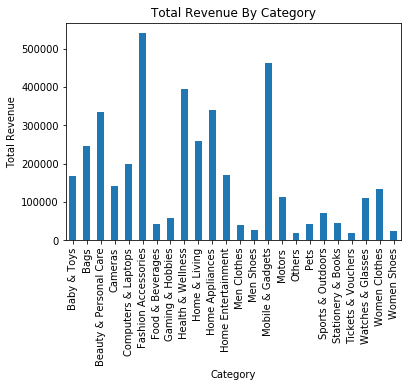

In [4]:
##Write your code here:
ax = df.groupby('Category').sum()['Revenue'].plot.bar()
ax.set_title('Total Revenue By Category')
ax.set_ylabel('Total Revenue')
plt.show()
####################